In [11]:
import os
import sys
import time

import numpy as np

import GCode
import GRBL

# Draw a Brick Pattern

Attempt at programmatically making a brick pattern.

All units in mm. ```1``` = ```1 mm```.

"Napkin" scratches.

![](http://luckofthedraw.fun/.imgs/brick_0003.jpeg)

Drawn by hand. ~18mm brick height.

![](http://luckofthedraw.fun/.imgs/brick_0001.jpeg)

> Standard bricks. The standard co-ordinating size for brickwork is 225 mm x 112.5 mm x 75 mm (length x depth x height). This includes 10 mm mortar joints, and so the standard size for a brick itself is 215 mm x 102.5 mm x 65 mm (length x depth x height).

In [20]:
# Standard brick dimensions.
BrickHeight = 65  # [mm]
BrickLength = 225  # [mm]
BrickDepth = 12.5  # [mm]
BrickRatio = 215 / 65  # [dimensionless]


In [21]:
# Poplar 1x4". Cut
BlockHeight = 89.0  # mm
BlockLength = 2 * BlockHeight  # mm


In [24]:
# Drawing configuration.
# How many rows of bricks to draw on the block.
N_BrickRows = 5  # [dimensionless]

# Dimensions of a 'brick' projected onto the block of wood.
H_Block_Brick = BlockHeight / N_BrickRows  # [mm]
L_Block_Brick = H_Block_Brick * BrickRatio  # [mm]


# Code:

In [25]:
flip = np.array([[1, 1], [1, 0]])
transform_tuple = (
    np.eye(2), # Identity matrix, do nothing.
    np.eye(2), # Do nothing, for debugging.
    flip # Flip the matrix, reduces travel time.
)
vertical_brick_lines_tuple = (
    np.round(np.arange(L_Block_Brick, BlockLength, L_Block_Brick), 4), # Odd rows.
    np.round(np.arange(L_Block_Brick/2, BlockLength, L_Block_Brick), 4), # Even rows.
);
horizontal_brick_lines = np.round(np.linspace(0, BlockHeight, N_BrickRows, endpoint=False), 4)


Lines parallel to the X-axis.
Separates rows of bricks.

In [27]:
horizontal_brick_lines

array([ 0. , 17.8, 35.6, 53.4, 71.2])

Lines parallel to the Y-axis.

In [28]:
vertical_brick_lines_tuple

(array([ 58.8769, 117.7538, 176.6308]), array([ 29.4385,  88.3154, 147.1923]))

In [34]:
points = list()


lines = list()

for idx in range(1, len(horizontal_brick_lines)):
    # Top horizontal line that defines each 'brick'
    horizontal_brick_line=horizontal_brick_lines[idx]
    row_line_points = np.array(
            [
                [
                    0,
                    horizontal_brick_line
                ],
                [
                    BlockLength,
                    horizontal_brick_line
                ]
            ]
        )

    # Transform to perform on the row points.
    transform = transform_tuple[np.mod(idx, 2)]
    row_line_points = np.round(np.matmul(transform, row_line_points),4)
    lines.append(GCode.Line(row_line_points))

    # Vertical brick line.
    vertical_brick_lines = vertical_brick_lines_tuple[np.mod(idx, 2)]
    start_point_y = horizontal_brick_lines[idx-1]
    end_point_y = horizontal_brick_lines[idx]
    for idx2, vertical_brick_line in enumerate(vertical_brick_lines):
        transform = np.round(transform_tuple[np.mod(idx2, 2)], 4)
        
        column_line_points =np.array(
                [
                    [start_point_y, vertical_brick_line],
                    [end_point_y, vertical_brick_line]
                ]
            ),
        column_line_points = np.matmul(transform, column_line_points)
        lines.append(GCode.Line(row_line_points))

In [36]:
lines

[<GCode>[cmds=0],
 <GCode>[cmds=0],
 <GCode>[cmds=0],
 <GCode>[cmds=0],
 <GCode>[cmds=0],
 <GCode>[cmds=0],
 <GCode>[cmds=0],
 <GCode>[cmds=0],
 <GCode>[cmds=0],
 <GCode>[cmds=0],
 <GCode>[cmds=0],
 <GCode>[cmds=0],
 <GCode>[cmds=0],
 <GCode>[cmds=0],
 <GCode>[cmds=0],
 <GCode>[cmds=0]]

In [56]:
for line in lines:
    break

In [57]:
line.generate_gcode()

In [58]:
lines

[<GCode>[cmds=11],
 <GCode>[cmds=11],
 <GCode>[cmds=11],
 <GCode>[cmds=11],
 <GCode>[cmds=11],
 <GCode>[cmds=11],
 <GCode>[cmds=11],
 <GCode>[cmds=11],
 <GCode>[cmds=11],
 <GCode>[cmds=11],
 <GCode>[cmds=11],
 <GCode>[cmds=11],
 <GCode>[cmds=11],
 <GCode>[cmds=11],
 <GCode>[cmds=11],
 <GCode>[cmds=11]]

In [59]:
list(map(lambda line: line.generate_gcode(), lines))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [61]:
line

<GCode>[cmds=11]

In [62]:
line.points

array([[  0. ,  17.8],
       [178. ,  17.8]])

In [64]:
import matplotlib.pyplot as plt


In [69]:
current_pos = np.array([[0], [0]])

In [75]:
X = np.array([[current_pos[0]], [line.points[0][0]]])
Y = np.array([[current_pos[1]], [line.points[0][1]]])

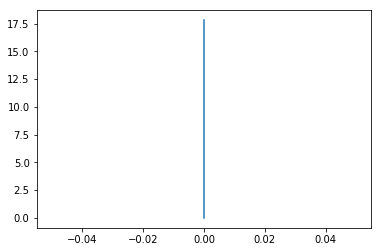

In [76]:
plt.xkcd()
plt.plot(X, Y)


In [77]:
for idx in range(1, len(line.points)):
    print(idx)

1


In [82]:
(line.points[idx-1][0], line.points[idx][0])

(0.0, 178.0)

In [83]:
(line.points[idx-1][1], line.points[idx][1])

(17.8, 17.8)

In [ ]:
for idx in range(1, len(line.points)):
    X=(line.points[idx-1][0], line.points[idx][0])
    Y=(line.points[idx-1][1], line.points[idx][1])
    plt.plot(X,)